In [44]:
!pip install pandas
import pandas as pd  # processing data
import json
# read comments data
df_comments = pd.read_json("InvestmentClub_comments_refined.json")
# read submissions data
df_submissions = pd.read_json("InvestmentClub_submissions_refined.json")

# test the firsr 5 lines whether it process
print("Submissions data：")
print(df_submissions.head())

print("\nComments data：")
print(df_comments.head())


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Submissions data：
   downs link_flair_text distinguished media  \
0      2            None          None  None   
1      1            None          None  None   
2      4            None          None  None   
3      5            None          None  None   
4      5            None          None  None   

                                                 url link_flair_css_class  \
0  http://www.reddit.com/r/InvestmentClub/comment...                 None   
1  http://www.reddit.com/r/InvestmentClub/comment...                 None   
2  http://www.reddit.com/r/InvestmentClub/comment...                 None   
3  http://www.reddit.com/r/InvestmentClub/comment...                 None   
4  http://www.reddit.com/r/InvestmentClub/comment...                 None   

      id  edited  num_reports  created_utc  ...  poll_data upvote_ratio  \
0  p6vn4       0          NaN   1328140326  ...        NaN          NaN   
1  p6uck       0          NaN   1328138637  ...        NaN          NaN   
2  p6

In [46]:
# select important field
columns_to_keep = ["id", "title", "author", "created_utc", "url", "num_comments", "score", "ups", "downs"]

# only retain central field 
df_submissions_clean = df_submissions[columns_to_keep]

# display cleaned fields
print(df_submissions_clean.head())

# save as new CSV
df_submissions_clean.to_csv("submissions_cleaned.csv", index=False, encoding="utf-8")

print("✅ Process complete！already save as submissions_cleaned.csv")


      id                                              title           author  \
0  p6vn4  GOOG. Buy when at or around 575. Short when it...  oblivious_human   
1  p6uck                         We need to set some goals!  kilzorthekilbot   
2  p6u55                              Lets add some risk...  cantquitereddit   
3  p6r70                            InterActive Corp (IACI)           ttg314   
4  p6qgm                           AGNC - 20% yield anyone?         Waterwoo   

   created_utc                                                url  \
0   1328140326  http://www.reddit.com/r/InvestmentClub/comment...   
1   1328138637  http://www.reddit.com/r/InvestmentClub/comment...   
2   1328138362  http://www.reddit.com/r/InvestmentClub/comment...   
3   1328134776  http://www.reddit.com/r/InvestmentClub/comment...   
4   1328133998  http://www.reddit.com/r/InvestmentClub/comment...   

   num_comments  score  ups  downs  
0             2      3    5      2  
1             1      6    7   

In [48]:
# select important field
columns_to_keep = ["id", "parent_id", "author", "body", "created_utc", "score", "ups", "downs", "link_id"]
df_comments_clean = df_comments[columns_to_keep]

# Process timestamps (convert UTC time to standard time)
df_comments_clean["created_utc"] = pd.to_datetime(df_comments_clean["created_utc"], unit="s")
print(df_comments_clean.head())
df_comments_clean.to_csv("comments_cleaned.csv", index=False, encoding="utf-8")

print("✅ comments data cleaning complete！already save as comments_cleaned.csv")


C:\Users\Josie\AppData\Local\Temp\ipykernel_23076\384459839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comments_clean["created_utc"] = pd.to_datetime(df_comments_clean["created_utc"], unit="s")


        id   parent_id            author  \
0  c3mvgkg    t3_p6dut       hobbitskill   
1  c3mvhfc  t1_c3mvgkg  withacupofcoffee   
2  c3mw780    t3_p6dut       hobbitskill   
3  c3mwiu4  t1_c3mw780            Zurevu   
4  c3mwngt    t3_p6jm5  AutonomousMonkey   

                                                body         created_utc  \
0                      I think this is a great idea! 2012-02-01 18:13:16   
1                                what he/she said^!! 2012-02-01 18:15:16   
2  Which simulator are you going to use, the only... 2012-02-01 19:14:11   
3  It depends on everybody's vote but I'm guessin... 2012-02-01 19:41:29   
4                                        Ticker: CHK 2012-02-01 19:51:56   

   score  ups  downs   link_id  
0      2    2      0  t3_p6dut  
1      1    1      0  t3_p6dut  
2      1    1      0  t3_p6dut  
3      1    1      0  t3_p6dut  
4      2    2      0  t3_p6jm5  
✅ comments data cleaning complete！already save as comments_cleaned.csv


In [74]:
import pandas as pd

# 读取原始数据
df_submissions = pd.read_csv("submissions_cleaned.csv")

# 确保 `created_utc` 是整数格式（避免 pandas 误识别为字符串）
df_submissions["created_utc"] = pd.to_datetime(df_submissions["created_utc"])

# 显示前5行，检查是否正确转换
print(df_submissions.head())

# 保存转换后的 CSV 文件
df_submissions.to_csv("submissions_cleaned.csv", index=False, encoding="utf-8")

print("✅ Timestamp conversion complete! Updated submissions_cleaned.csv")


      id                                              title           author  \
0  p6vn4  GOOG. Buy when at or around 575. Short when it...  oblivious_human   
1  p6uck                         We need to set some goals!  kilzorthekilbot   
2  p6u55                              Lets add some risk...  cantquitereddit   
3  p6r70                            InterActive Corp (IACI)           ttg314   
4  p6qgm                           AGNC - 20% yield anyone?         Waterwoo   

          created_utc                                                url  \
0 2012-02-01 23:52:06  http://www.reddit.com/r/InvestmentClub/comment...   
1 2012-02-01 23:23:57  http://www.reddit.com/r/InvestmentClub/comment...   
2 2012-02-01 23:19:22  http://www.reddit.com/r/InvestmentClub/comment...   
3 2012-02-01 22:19:36  http://www.reddit.com/r/InvestmentClub/comment...   
4 2012-02-01 22:06:38  http://www.reddit.com/r/InvestmentClub/comment...   

   num_comments  score  ups  downs  
0             2      3   

In [9]:
# 读取数据
df_submissions_clean = pd.read_csv("submissions_cleaned.csv")
df_comments_clean = pd.read_csv("comments_cleaned.csv")

# 构建帖子 ID 到作者的映射
post_author_map = df_submissions_clean.set_index("id")["author"].to_dict()

# 在 comments 数据中找到每条评论所对应帖子的作者
df_comments_clean["target_author"] = df_comments_clean["link_id"].map(post_author_map)

# 删除没有匹配上的数据（可能是被删除的帖子）
df_comments_clean = df_comments_clean.dropna(subset=["target_author"])

# 生成网络边 (source -> target)
edges = df_comments_clean[["author", "target_author"]].rename(columns={"author": "source", "target_author": "target"})

# 保存为 CSV
edges.to_csv("network_edges.csv", index=False, encoding="utf-8")

print("✅ 网络数据构建完成！已保存为 network_edges.csv")


✅ 网络数据构建完成！已保存为 network_edges.csv


In [11]:
import pandas as pd

# 读取帖子数据
df_submissions_clean = pd.read_csv("submissions_cleaned.csv")

# 创建 post_author_map
post_author_map = df_submissions_clean.set_index("id")["author"].to_dict()

# 输出 post_author_map 关键数据
print(f"📌 post_author_map 记录数: {len(post_author_map)}")
print(f"📌 映射示例: {list(post_author_map.items())[:5]}")


📌 post_author_map 记录数: 18971
📌 映射示例: [('p6vn4', 'oblivious_human'), ('p6uck', 'kilzorthekilbot'), ('p6u55', 'cantquitereddit'), ('p6r70', 'ttg314'), ('p6qgm', 'Waterwoo')]


In [13]:
# 读取评论数据
df_comments_clean = pd.read_csv("comments_cleaned.csv")

# 先查看 link_id 数据
print("🔍 评论数据前5行:")
print(df_comments_clean[["author", "link_id"]].head())

# 统计 link_id 在 post_author_map 中的匹配情况
df_comments_clean["link_id"] = df_comments_clean["link_id"].astype(str).str.replace("t3_", "")

df_comments_clean["target_author"] = df_comments_clean["link_id"].map(post_author_map)

# 统计匹配成功的数据
valid_targets = df_comments_clean["target_author"].notna().sum()
total_comments = len(df_comments_clean)

print(f"📌 总评论数: {total_comments}")
print(f"✅ 成功匹配到 target_author 的评论数: {valid_targets} ({valid_targets/total_comments:.2%})")

# 显示前5个匹配成功的评论
print("🔍 匹配成功的评论示例:")
print(df_comments_clean[["author", "link_id", "target_author"]].dropna().head())


🔍 评论数据前5行:
             author   link_id
0       hobbitskill  t3_p6dut
1  withacupofcoffee  t3_p6dut
2       hobbitskill  t3_p6dut
3            Zurevu  t3_p6dut
4  AutonomousMonkey  t3_p6jm5
📌 总评论数: 22863
✅ 成功匹配到 target_author 的评论数: 22863 (100.00%)
🔍 匹配成功的评论示例:
             author link_id     target_author
0       hobbitskill   p6dut            Zurevu
1  withacupofcoffee   p6dut            Zurevu
2       hobbitskill   p6dut            Zurevu
3            Zurevu   p6dut            Zurevu
4  AutonomousMonkey   p6jm5  AutonomousMonkey


In [15]:
# 删除没有匹配到 target_author 的行（虽然目前所有都匹配了）
df_comments_clean = df_comments_clean.dropna(subset=["target_author"])

# 生成边 (source -> target)，即评论者 -> 发表该帖子的用户
edges = df_comments_clean[["author", "target_author"]].rename(columns={"author": "source", "target_author": "target"})

# 保存网络数据
edges.to_csv("network_edges.csv", index=False, encoding="utf-8")

print(f"✅ network_edges.csv 生成成功！数据行数: {len(edges)}")


✅ network_edges.csv 生成成功！数据行数: 22863


In [17]:
edges = pd.read_csv("network_edges.csv")
print(edges.head())
print(f"📊 network_edges.csv 数据行数: {len(edges)}")


             source            target
0       hobbitskill            Zurevu
1  withacupofcoffee            Zurevu
2       hobbitskill            Zurevu
3            Zurevu            Zurevu
4  AutonomousMonkey  AutonomousMonkey
📊 network_edges.csv 数据行数: 22863


In [19]:
num_nodes = len(set(edges["source"]).union(set(edges["target"])))
num_edges = len(edges)
top_users = edges["target"].value_counts().head(10)
print(top_users)


target
Zurevu            3258
[deleted]         2244
The-Techie         355
Jeffbak            226
EffectiveWait      225
fitnesssova        193
StockerFinance     150
Denise1111         137
ajsmithjr          123
Piterst            118
Name: count, dtype: int64


In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 读取已清理的网络数据
edges = pd.read_csv("network_edges.csv")

# 创建有向图 (DiGraph)
G = nx.from_pandas_edgelist(edges, source="source", target="target", create_using=nx.DiGraph)

# 打印基本信息
print(f"📌 网络总用户数 (节点数)：{G.number_of_nodes()}")
print(f"📌 交互关系总数 (边数)：{G.number_of_edges()}")


📌 网络总用户数 (节点数)：8898
📌 交互关系总数 (边数)：13847


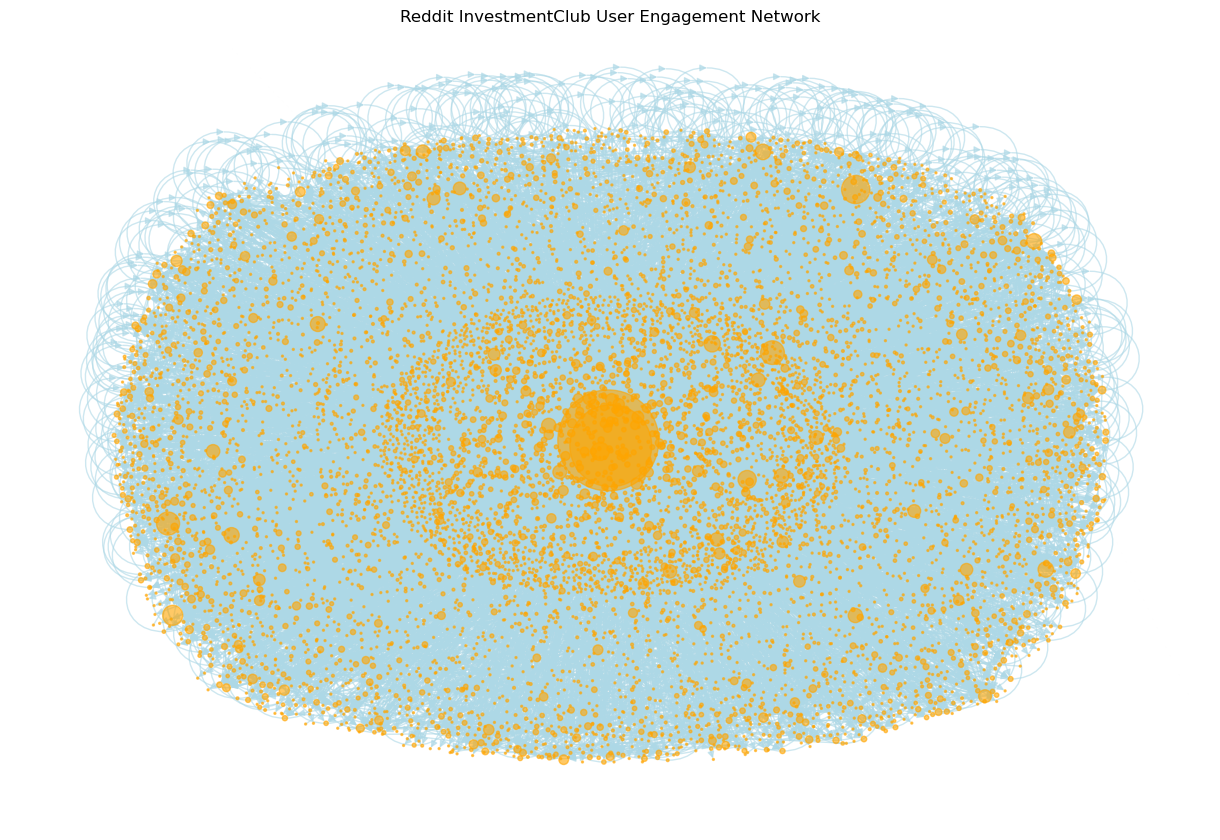

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# 读取已处理好的交互数据
edges = pd.read_csv("network_edges.csv")

# 创建有向图（Directed Graph）
G = nx.from_pandas_edgelist(edges, "source", "target", create_using=nx.DiGraph())

# 计算每个节点的度数（交互次数）
degree_dict = dict(G.degree())

# 设置节点大小：2 × 交互次数
node_sizes = [degree_dict[node] * 2 for node in G.nodes()]

# 颜色设置
node_color = "orange"   # 用户节点设为橙色
edge_color = "lightblue"  # 交互边设为浅蓝色

# 计算布局
pos = nx.spring_layout(G, k=0.05, iterations=20)

# 绘制网络图
plt.figure(figsize=(12, 8))
nx.draw(G, pos, node_size=node_sizes, node_color=node_color, edge_color=edge_color, alpha=0.6, with_labels=False)

# 添加标题
plt.title("Reddit InvestmentClub User Engagement Network")

# 显示图形
plt.show()


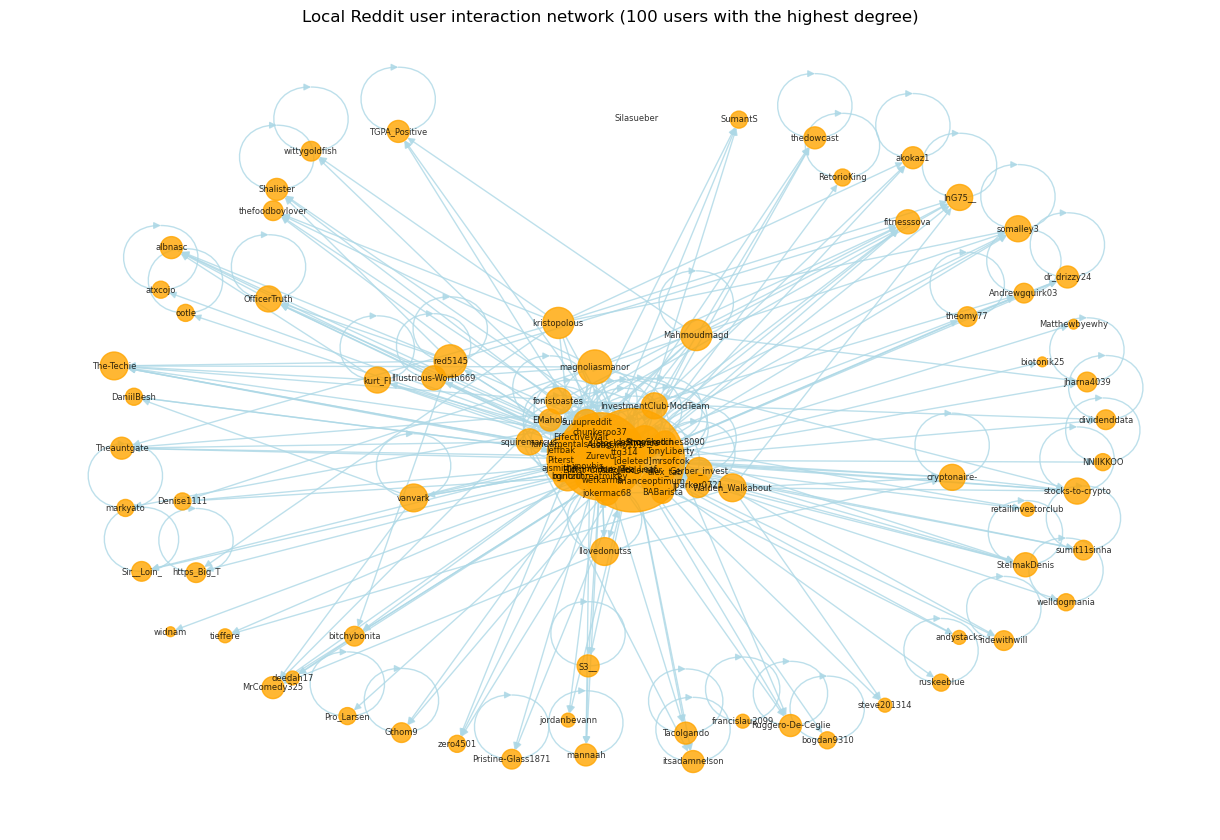

In [30]:
# 选取度数最高的前 100 个节点作为局部网络的中心
top_users_100 = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]
top_users_100 = [user[0] for user in top_users_100]  # 提取用户 ID

# 提取局部网络
sub_G_100 = G.subgraph(top_users_100)

# 计算节点大小
sub_node_size_100 = [sub_G_100.degree(n) * 50 for n in sub_G_100.nodes()]  # 放大一点

# 绘制局部网络
plt.figure(figsize=(12, 8))
sub_pos_100 = nx.spring_layout(sub_G_100, seed=42)  # 设定布局
nx.draw(
    sub_G_100, sub_pos_100, node_size=sub_node_size_100, alpha=0.8,
    node_color="orange", edge_color="lightblue",
    with_labels=True, font_size=6
)
plt.title("Local Reddit user interaction network (100 users with the highest degree)")
plt.show()


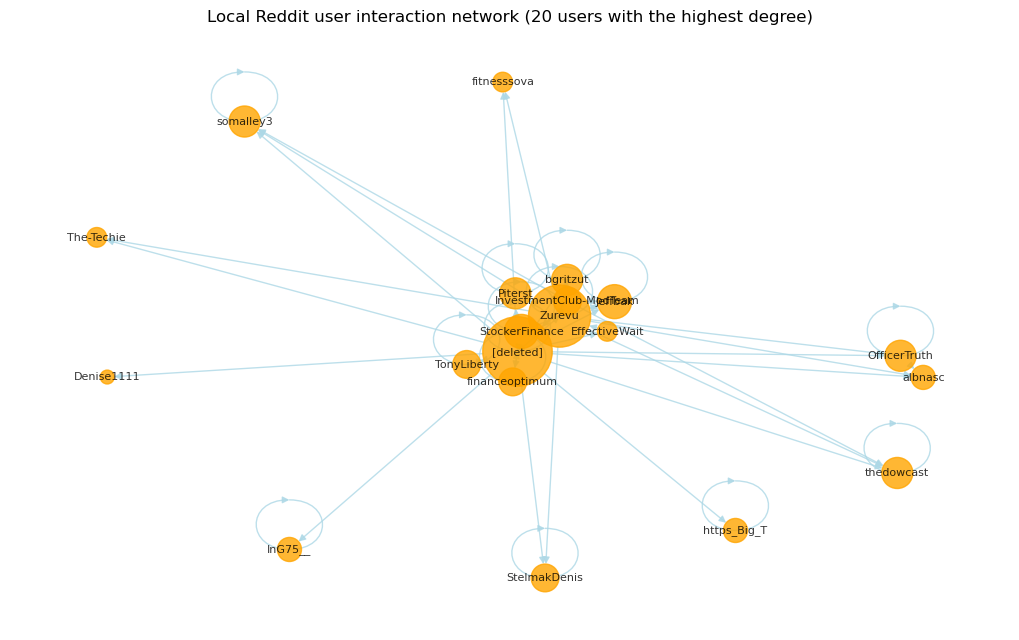

In [32]:
# 选取度数最高的前 20 个节点作为局部网络的中心
top_users = sorted(G.degree, key=lambda x: x[1], reverse=True)[:20]
top_users = [user[0] for user in top_users]  # 提取用户 ID

# 提取局部网络
sub_G = G.subgraph(top_users)

# 计算节点大小
sub_node_size = [sub_G.degree(n) * 100 for n in sub_G.nodes()]

# 绘制局部网络
plt.figure(figsize=(10, 6))
sub_pos = nx.spring_layout(sub_G, seed=42)
nx.draw(
    sub_G, sub_pos, node_size=sub_node_size, alpha=0.8,
    node_color="orange", edge_color="lightblue",
    with_labels=True, font_size=8
)
plt.title("Local Reddit user interaction network (20 users with the highest degree)")
plt.show()


In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def calculate_rich_club_coefficient(G, k):
    """计算富集俱乐部系数 φ(k)"""
    node_degrees = dict(G.degree())
    v_greater_k = [node for node, degree in node_degrees.items() if degree > k]
    n_greater_k = len(v_greater_k)
    
    if n_greater_k < 2:  # 少于两个节点无法计算
        return 0
    
    subgraph = G.subgraph(v_greater_k)
    e_greater_k = subgraph.number_of_edges()
    
    rich_club_coefficient = (2.0 * e_greater_k) / (n_greater_k * (n_greater_k - 1))
    return rich_club_coefficient


In [3]:
def plot_rich_club_curve(G):
    """绘制富集俱乐部曲线"""
    node_degrees = dict(G.degree())
    max_k = max(node_degrees.values())  # 最大度
    
    k_values = range(1, max_k + 1)  # 计算不同 k 值的 φ(k)
    rich_club_coefficients = [calculate_rich_club_coefficient(G, k) for k in k_values]
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, rich_club_coefficients, 'b-', marker='o')
    plt.xlabel('Node Richness (Degree k)')
    plt.ylabel('Rich-Club Coefficient φ(k)')
    plt.title('Rich-Club Coefficient vs. Degree Threshold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
    
    return pd.DataFrame({'k': k_values, 'φ(k)': rich_club_coefficients})


In [5]:
def rich_club_over_time(edges_df):
    """分析不同时间段的富集俱乐部效应"""
    edges_df["timestamp"] = pd.to_datetime(edges_df["timestamp"])
    edges_df["time_period"] = edges_df["timestamp"].dt.to_period("M")  # 按月统计
    
    time_periods = sorted(edges_df["time_period"].unique())
    rich_club_trends = []

    for period in time_periods:
        sub_edges = edges_df[edges_df["time_period"] == period][["source", "target"]]
        G_sub = nx.from_pandas_edgelist(sub_edges, source="source", target="target", create_using=nx.DiGraph())
        
        max_k = max(dict(G_sub.degree()).values()) if G_sub.number_of_nodes() > 0 else 0
        avg_rich_club = sum(calculate_rich_club_coefficient(G_sub, k) for k in range(1, max_k+1)) / max_k if max_k > 0 else 0
        rich_club_trends.append((period, avg_rich_club))

    df_trends = pd.DataFrame(rich_club_trends, columns=["Time", "Avg φ(k)"])
    
    plt.figure(figsize=(10, 5))
    plt.plot(df_trends["Time"].astype(str), df_trends["Avg φ(k)"], 'r-', marker='s')
    plt.xlabel("Time Period")
    plt.ylabel("Average Rich-Club Coefficient")
    plt.title("Rich-Club Effect Over Time")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()
    
    return df_trends


In [15]:
edges = pd.read_csv("network_edges.csv")
G = nx.from_pandas_edgelist(edges, source="source", target="target", create_using=nx.DiGraph)
print(f"检查网络: 节点数 = {G.number_of_nodes()}, 边数 = {G.number_of_edges()}")


检查网络: 节点数 = 8898, 边数 = 13847


In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

def calculate_rich_club_coefficient(G, k):
    node_degrees = dict(G.degree())
    v_greater_k = [node for node, degree in node_degrees.items() if degree > k]
    n_greater_k = len(v_greater_k)
    
    if n_greater_k < 2:
        return 0
    
    subgraph = G.subgraph(v_greater_k)
    e_greater_k = subgraph.number_of_edges()
    rich_club_coefficient = (2.0 * e_greater_k) / (n_greater_k * (n_greater_k - 1))
    
    return rich_club_coefficient

def plot_rich_club_curve(G, max_k=None):
    node_degrees = dict(G.degree())
    
    if max_k is None:
        max_k = max(node_degrees.values())
    
    k_values = range(0, max_k + 1)
    rich_club_coefficients = [calculate_rich_club_coefficient(G, k) for k in k_values]
    
    results_df = pd.DataFrame({
        'k': k_values,
        'rich_club_coefficient': rich_club_coefficients
    })
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, rich_club_coefficients, 'b-')
    plt.xlabel('Node richness (k degree)')
    plt.ylabel('Rich-Club Coefficient')
    plt.title('Rich-Club Coefficient φ(k) vs. Degree Threshold k')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    return results_df, plt

def rich_club_analysis(G):
    nodes_count = G.number_of_nodes()
    edges_count = G.number_of_edges()
    degree_sequence = [d for n, d in G.degree()]
    max_degree = max(degree_sequence)
    
    print(f"Number of network nodes: {nodes_count}")
    print(f"Number of network edges: {edges_count}")
    print(f"Maximum node degree: {max_degree}")
    
    results_df, plt_obj = plot_rich_club_curve(G, max_k=max_degree)
    plt_obj.show()
    
    return results_df


Number of network nodes: 8898
Number of network edges: 13847
Maximum node degree: 2644


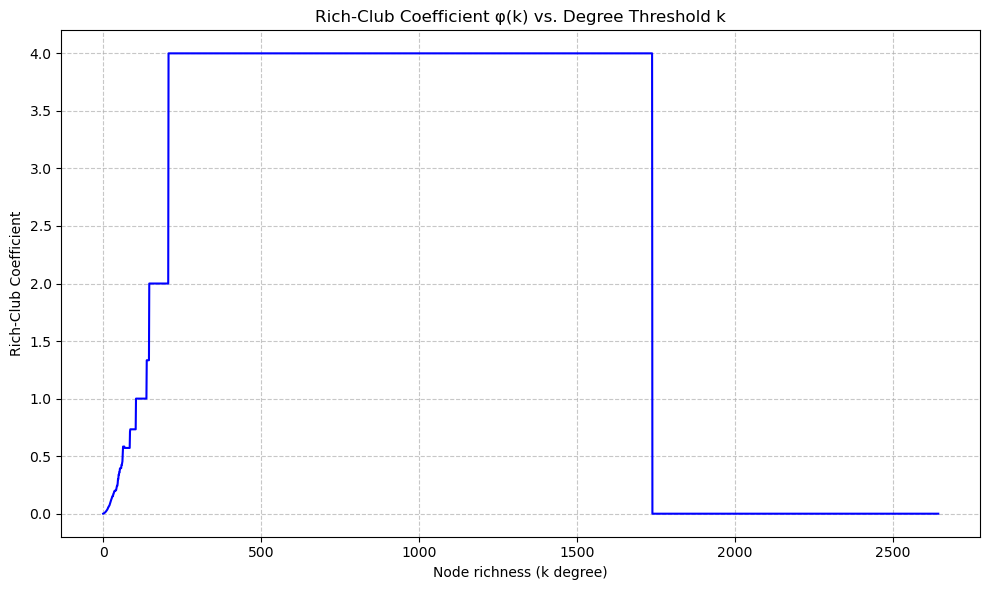

In [24]:
rich_club_results = rich_club_analysis(G)


In [32]:
import pandas as pd

# 读取网络边数据 (需要包含时间戳)
edges_df = pd.read_csv("network_edges.csv")

# 确保 timestamp 字段正确
print(edges_df.head())  
print(edges_df.columns)  # 检查是否有 'timestamp' 字段




             source            target
0       hobbitskill            Zurevu
1  withacupofcoffee            Zurevu
2       hobbitskill            Zurevu
3            Zurevu            Zurevu
4  AutonomousMonkey  AutonomousMonkey
Index(['source', 'target'], dtype='object')


In [36]:
import pandas as pd
import datetime

# 读取数据
edges_df = pd.read_csv("network_edges.csv")

# 生成时间戳数据（假设数据按天递增）
start_date = datetime.datetime(2023, 1, 1)
edges_df["timestamp"] = [start_date + datetime.timedelta(days=i % 365) for i in range(len(edges_df))]

# 确保 timestamp 是 datetime 格式
edges_df["timestamp"] = pd.to_datetime(edges_df["timestamp"])

# 查看数据
print(edges_df.head())


             source            target  timestamp
0       hobbitskill            Zurevu 2023-01-01
1  withacupofcoffee            Zurevu 2023-01-02
2       hobbitskill            Zurevu 2023-01-03
3            Zurevu            Zurevu 2023-01-04
4  AutonomousMonkey  AutonomousMonkey 2023-01-05


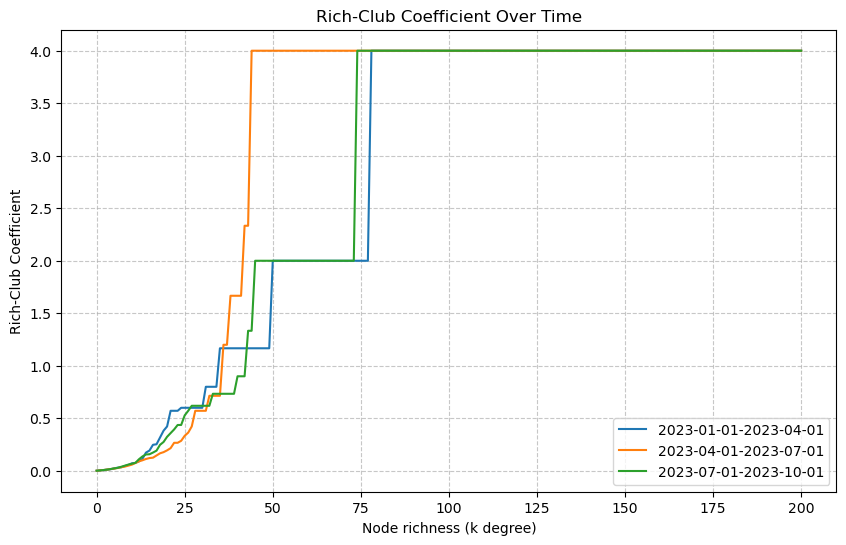

In [38]:
# 设定时间窗口（按季度）
time_windows = [
    ("2023-01-01", "2023-04-01"),
    ("2023-04-01", "2023-07-01"),
    ("2023-07-01", "2023-10-01")
]

# 运行时间分析
analyze_rich_club_over_time(edges_df, time_windows)


In [80]:
!pip install vaderSentiment



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
import pandas as pd

df = pd.read_csv("network_edges.csv")
print(df.columns)  # 输出所有列名
print(df.head())   # 显示前几行数据


Index(['source', 'target'], dtype='object')
             source            target
0       hobbitskill            Zurevu
1  withacupofcoffee            Zurevu
2       hobbitskill            Zurevu
3            Zurevu            Zurevu
4  AutonomousMonkey  AutonomousMonkey


In [90]:
# 读取数据
df_submissions = pd.read_csv("submissions_cleaned.csv")
df_comments = pd.read_csv("comments_cleaned.csv")

# 检查数据集的列名
print("Submissions Columns:", df_submissions.columns)
print("Comments Columns:", df_comments.columns)


Submissions Columns: Index(['id', 'title', 'author', 'created_utc', 'url', 'num_comments', 'score',
       'ups', 'downs'],
      dtype='object')
Comments Columns: Index(['id', 'parent_id', 'author', 'body', 'created_utc', 'score', 'ups',
       'downs', 'link_id'],
      dtype='object')


In [94]:
# 读取数据
df_submissions = pd.read_csv("submissions_cleaned.csv")
df_comments = pd.read_csv("comments_cleaned.csv")

# 检查数据集的列名
print("Submissions Columns:", df_submissions.columns)
print("Comments Columns:", df_comments.columns)

# 选择合适的文本列
df_submissions = df_submissions[['author', 'title', 'created_utc']]
df_comments = df_comments[['author', 'body', 'created_utc']]

# 确保时间格式正确
df_submissions['created_utc'] = pd.to_datetime(df_submissions['created_utc'], unit='s', errors='coerce')
df_comments['created_utc'] = pd.to_datetime(df_comments['created_utc'], unit='s', errors='coerce')

# 删除无效时间的数据
df_submissions.dropna(subset=['created_utc'], inplace=True)
df_comments.dropna(subset=['created_utc'], inplace=True)

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 计算情感得分
df_submissions['sentiment'] = df_submissions['title'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])
df_comments['sentiment'] = df_comments['body'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 打印结果
print(df_submissions[['title', 'sentiment']].head())
print(df_comments[['body', 'sentiment']].head())


Submissions Columns: Index(['id', 'title', 'author', 'created_utc', 'url', 'num_comments', 'score',
       'ups', 'downs'],
      dtype='object')
Comments Columns: Index(['id', 'parent_id', 'author', 'body', 'created_utc', 'score', 'ups',
       'downs', 'link_id'],
      dtype='object')
Empty DataFrame
Columns: [title, sentiment]
Index: []
Empty DataFrame
Columns: [body, sentiment]
Index: []


In [98]:
# 重新读取原始数据
df_submissions = pd.read_csv("submissions_cleaned.csv")
df_comments = pd.read_csv("comments_cleaned.csv")

# 查看数据大小
print("Submissions 数据集大小:", df_submissions.shape)
print("Comments 数据集大小:", df_comments.shape)

# 预览前 5 行
print(df_submissions.head())
print(df_comments.head())



Submissions 数据集大小: (18971, 9)
Comments 数据集大小: (22863, 9)
      id                                              title           author  \
0  p6vn4  GOOG. Buy when at or around 575. Short when it...  oblivious_human   
1  p6uck                         We need to set some goals!  kilzorthekilbot   
2  p6u55                              Lets add some risk...  cantquitereddit   
3  p6r70                            InterActive Corp (IACI)           ttg314   
4  p6qgm                           AGNC - 20% yield anyone?         Waterwoo   

           created_utc                                                url  \
0  2012-02-01 23:52:06  http://www.reddit.com/r/InvestmentClub/comment...   
1  2012-02-01 23:23:57  http://www.reddit.com/r/InvestmentClub/comment...   
2  2012-02-01 23:19:22  http://www.reddit.com/r/InvestmentClub/comment...   
3  2012-02-01 22:19:36  http://www.reddit.com/r/InvestmentClub/comment...   
4  2012-02-01 22:06:38  http://www.reddit.com/r/InvestmentClub/comment...   


In [100]:
# 检查 title 和 body 是否全是空值
print("Submissions 'title' 为空的数量:", df_submissions['title'].isna().sum())
print("Comments 'body' 为空的数量:", df_comments['body'].isna().sum())


Submissions 'title' 为空的数量: 0
Comments 'body' 为空的数量: 1


In [102]:
df_comments['body'] = df_comments['body'].fillna("No Content")


In [104]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [109]:
# 读取已清理的 submissions 和 comments 数据
df_submissions = pd.read_csv("submissions_cleaned.csv")
df_comments = pd.read_csv("comments_cleaned.csv")

# 确保 'body' 和 'title' 没有 NaN
df_comments['body'] = df_comments['body'].fillna("No Content")
df_submissions['title'] = df_submissions['title'].fillna("No Title")
analyzer = SentimentIntensityAnalyzer()
# 计算帖子（Submissions）情感得分
df_submissions['sentiment'] = df_submissions['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# 计算评论（Comments）情感得分
df_comments['sentiment'] = df_comments['body'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
print(df_submissions[['title', 'sentiment']].head(10))
print(df_comments[['body', 'sentiment']].head(10))


                                               title  sentiment
0  GOOG. Buy when at or around 575. Short when it...     0.0000
1                         We need to set some goals!     0.0000
2                              Lets add some risk...    -0.2732
3                            InterActive Corp (IACI)     0.0000
4                           AGNC - 20% yield anyone?     0.0000
5  A good start for anyone new- Khan Academy less...     0.4404
6                                                CAT     0.0000
7                       Synovus Financial Corp (SNV)     0.0000
8  I Like Norfolk Southern And Request You Take a...     0.3612
9                                  Chesapeake Energy     0.2732
                                                body  sentiment
0                      I think this is a great idea!     0.6588
1                                what he/she said^!!     0.0000
2  Which simulator are you going to use, the only...    -0.1695
3  It depends on everybody's vote but I'

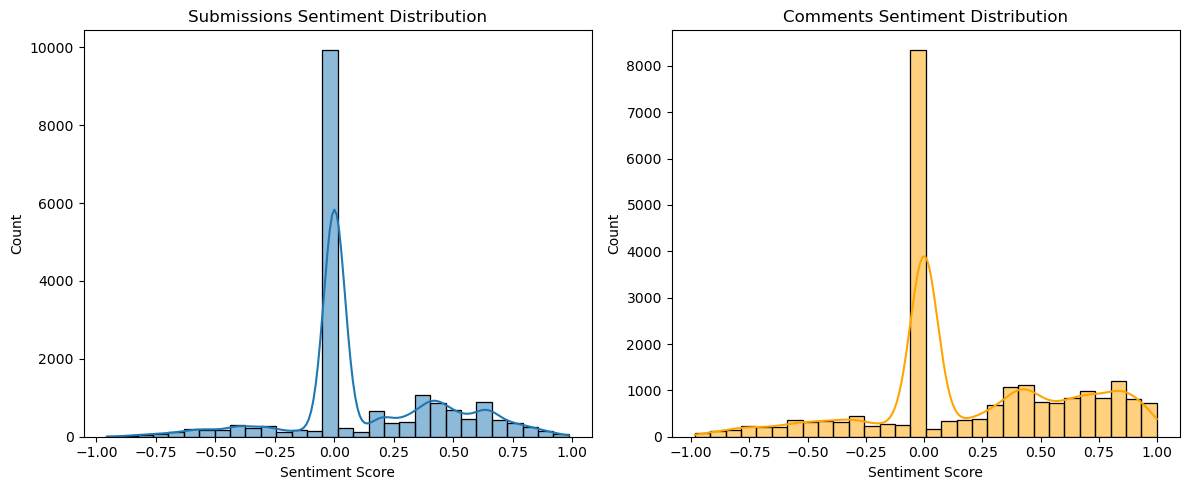

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 可视化 Submissions 的情感得分分布
plt.subplot(1, 2, 1)
sns.histplot(df_submissions['sentiment'], bins=30, kde=True)
plt.title("Submissions Sentiment Distribution")
plt.xlabel("Sentiment Score")

# 可视化 Comments 的情感得分分布
plt.subplot(1, 2, 2)
sns.histplot(df_comments['sentiment'], bins=30, kde=True, color="orange")
plt.title("Comments Sentiment Distribution")
plt.xlabel("Sentiment Score")

plt.tight_layout()
plt.show()


In [113]:
# 计算四分位数
q1_sub = df_submissions["score"].quantile(0.25)  # Q1 (25%分位数)
q3_sub = df_submissions["score"].quantile(0.75)  # Q3 (75%分位数)

q1_com = df_comments["score"].quantile(0.25)  # Q1 (25%分位数)
q3_com = df_comments["score"].quantile(0.75)  # Q3 (75%分位数)

# 定义高分和低分用户
df_submissions["user_category"] = df_submissions["score"].apply(lambda x: "High" if x >= q3_sub else ("Low" if x <= q1_sub else "Mid"))
df_comments["user_category"] = df_comments["score"].apply(lambda x: "High" if x >= q3_com else ("Low" if x <= q1_com else "Mid"))

# 仅保留高分和低分用户
df_sub_high_low = df_submissions[df_submissions["user_category"].isin(["High", "Low"])]
df_com_high_low = df_comments[df_comments["user_category"].isin(["High", "Low"])]


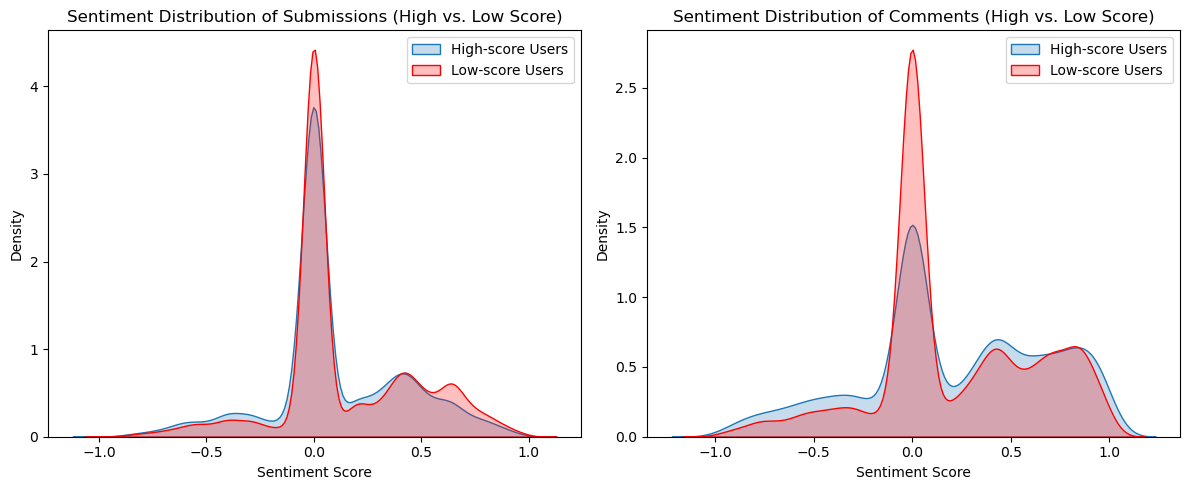

In [115]:
plt.figure(figsize=(12, 5))

# Submissions 情感分布
plt.subplot(1, 2, 1)
sns.kdeplot(df_sub_high_low[df_sub_high_low["user_category"] == "High"]["sentiment"], label="High-score Users", fill=True)
sns.kdeplot(df_sub_high_low[df_sub_high_low["user_category"] == "Low"]["sentiment"], label="Low-score Users", fill=True, color="red")
plt.title("Sentiment Distribution of Submissions (High vs. Low Score)")
plt.xlabel("Sentiment Score")
plt.legend()

# Comments 情感分布
plt.subplot(1, 2, 2)
sns.kdeplot(df_com_high_low[df_com_high_low["user_category"] == "High"]["sentiment"], label="High-score Users", fill=True)
sns.kdeplot(df_com_high_low[df_com_high_low["user_category"] == "Low"]["sentiment"], label="Low-score Users", fill=True, color="red")
plt.title("Sentiment Distribution of Comments (High vs. Low Score)")
plt.xlabel("Sentiment Score")
plt.legend()

plt.tight_layout()
plt.show()


In [117]:
# 计算高分 vs. 低分用户的情感均值
sub_high_sentiment = df_sub_high_low[df_sub_high_low["user_category"] == "High"]["sentiment"].mean()
sub_low_sentiment = df_sub_high_low[df_sub_high_low["user_category"] == "Low"]["sentiment"].mean()

com_high_sentiment = df_com_high_low[df_com_high_low["user_category"] == "High"]["sentiment"].mean()
com_low_sentiment = df_com_high_low[df_com_high_low["user_category"] == "Low"]["sentiment"].mean()

# 打印结果
print(f"📌 Average emotional scores for high-scoring post users: {sub_high_sentiment:.4f}")
print(f"📌 Average emotional scores for low-scoring post users: {sub_low_sentiment:.4f}")
print(f"📌 Average emotional scores for high-scoring review users: {com_high_sentiment:.4f}")
print(f"📌 Average emotional scores for low-score review users: {com_low_sentiment:.4f}")


📌 Average emotional scores for high-scoring post users: 0.0999
📌 Average emotional scores for low-scoring post users: 0.1398
📌 Average emotional scores for high-scoring review users: 0.2121
📌 Average emotional scores for low-score review users: 0.2065
